# DOJO ML - 3rd Place solution
## team : curiosos_do_ml 
## Mateus C. Pedrino - Bruno Rasteiro - HelloToMyLittleFriend

## Using trained models

The goal of this notebook is to read the trained models from the pickled gridsearch and test new data and generate some analysis.

In [5]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as skdata
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import pickle


import warnings
warnings.filterwarnings('ignore')

In [3]:
with open('gs_mlp.pkl', 'rb') as f:
    gs_mlp = pickle.load(f)

In [5]:
gs_mlp.best_params_

{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (10, 20, 10),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [10]:
gs_mlp.best_score_

0.9798830409356725

In [6]:
with open('gs_rf.pkl', 'rb') as f:
    gs_rf = pickle.load(f)

In [7]:
gs_rf.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 15}

In [11]:
gs_rf.best_score_

0.9796491228070175

In [6]:
with open('gs_xgb.pkl', 'rb') as f:
    gs_xgb = pickle.load(f)

In [7]:
gs_xgb.best_score_

0.9801559454191033

In [8]:
gs_xgb.best_params_

{'learning_rate': 0.05, 'max_depth': 7, 'max_features': 5, 'n_estimators': 15}

In [9]:
features_names=['idade', 'error1', 'error2', 'error3', 'error4', 'error5',
       'mean_voltagem', 'mean_rotacao', 'mean_pressao', 'mean_vibracao',
       'std_voltagem', 'std_rotacao', 'std_pressao', 'std_vibracao',
       'min_voltagem', 'min_rotacao', 'min_pressao', 'min_vibracao',
       'max_voltagem', 'max_rotacao', 'max_pressao', 'max_vibracao',
       'rms_voltagem', 'rms_rotacao', 'rms_pressao', 'rms_vibracao', 'model1',
       'model2', 'model3', 'model4']

In [10]:
len(features_names)

30

In [11]:
gs_xgb.best_estimator_.feature_importances_

array([0.05915307, 0.        , 0.00181508, 0.        , 0.        ,
       0.00181567, 0.02348728, 0.05761499, 0.0549453 , 0.04841419,
       0.02502958, 0.04152663, 0.04312959, 0.04705624, 0.01909538,
       0.02881742, 0.0223828 , 0.02004405, 0.01600026, 0.02450712,
       0.0206351 , 0.0244291 , 0.03038923, 0.02685717, 0.06321928,
       0.04446413, 0.0862167 , 0.05141994, 0.05621055, 0.06132413],
      dtype=float32)

In [12]:
bars=gs_xgb.best_estimator_.feature_importances_

In [14]:
bars, features_names = (list(t) for t in zip(*sorted(zip(bars, features_names), reverse=True)))

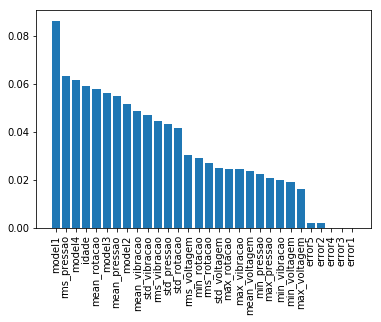

In [15]:
# Features importances from xgboost
plt.figure()
plt.bar(np.arange(0,len(features_names),1), bars)
plt.xticks(np.arange(0,len(features_names),1), features_names, rotation='vertical')
plt.show()